# Grop Project/ADS500B / Hoori Javadnia

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
The dataset is ordered by date (from May 2008 to November 2010).

# 1.Data Importing and Pre-processing

   

In [72]:
#At the begining we need to import all the packages we want use.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
%matplotlib inline
from scipy.stats import describe
import scipy.stats as sci
from scipy import stats

  Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    Clean, wrangle, and handle missing data
    Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    Reduce redundant data and perform need based discretization


In [73]:
#read the csv file which is separated by semicolons 
bank_data = pd.read_csv('bank_marketing.csv',sep=';')


In [74]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [75]:
#After checking the first 5 rows , we check the shape of the data. It contains 45,211 rows and 17 columns.
bank_data.shape

(45211, 17)

In [76]:
bank_data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [77]:
#from 17 columns, 10 are objects(objects are categorical variables) 
# 6  columns are presented numerically as integers (int64). 
# 1 other numerical variable is presented as a floating number with 2 decimal places (float64).

In [78]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data cleaning, wrangling, and handling missing data

In [79]:
#Number of nulls
bank_data.isnull().sum()

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [80]:
# let us see how many Null values are there
null_percentage = (bank_data.isnull().sum())/bank_data.shape[0]*100
null_percentage

age          2.961669
job          0.000000
marital      0.000000
education    0.000000
default      2.888678
balance      0.000000
housing      0.000000
loan         0.000000
contact      3.058990
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64

In [81]:
bank_data.skew(axis = 0, skipna = True)
# Acceptable values of skewness fall between − 3 and + 3

C:\Users\javad\AppData\Local\Temp/ipykernel_6856/4288155386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_data.skew(axis = 0, skipna = True)


age          0.685238
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [82]:
describe(bank_data['age'])

DescribeResult(nobs=45211, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

In [83]:
sci.normaltest(bank_data['age'])

NormaltestResult(statistic=nan, pvalue=nan)

In [84]:
#To handle missing values, we drop Nulls for the 'default' and 'contact' (categorical)
#for numerical values : "age " , we fill in tha nulls with median .
bank_data.dropna(subset=['default', 'contact'], inplace=True) 
bank_data['age'].fillna(int(bank_data['age'].median()), inplace=True)


<AxesSubplot:xlabel='age'>

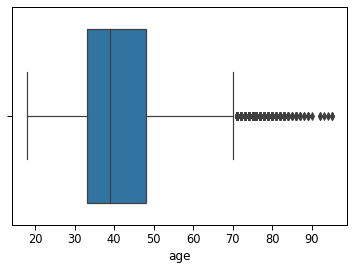

In [85]:
sns.boxplot(x = bank_data['age'])

In [86]:
bank_data['age'] = bank_data['age'].astype('int32')

In [87]:
bank_data.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [88]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42569 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42569 non-null  int32 
 1   job        42569 non-null  object
 2   marital    42569 non-null  object
 3   education  42569 non-null  object
 4   default    42569 non-null  object
 5   balance    42569 non-null  int64 
 6   housing    42569 non-null  object
 7   loan       42569 non-null  object
 8   contact    42569 non-null  object
 9   day        42569 non-null  int64 
 10  month      42569 non-null  object
 11  duration   42569 non-null  int64 
 12  campaign   42569 non-null  int64 
 13  pdays      42569 non-null  int64 
 14  previous   42569 non-null  int64 
 15  poutcome   42569 non-null  object
 16  deposit    42569 non-null  object
dtypes: int32(1), int64(6), object(10)
memory usage: 4.1+ MB


In [89]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42569.000000,42569.000000,42569.000000,42569.000000,42569.000000,42569.000000,42569.000000
mean,40.861284,1363.991379,15.814889,258.323945,2.763725,40.268764,0.580963
std,10.444423,3061.664637,8.321779,257.189053,3.088342,100.258342,2.329223
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,275.000000


In [90]:
print(type(bank_data))

<class 'pandas.core.frame.DataFrame'>



# 2. Data Analysis and Visualization


In [91]:
summary = round(bank_data.describe().T,2)
summary.drop(['count'], axis=1, inplace=True)
summary.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                            '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,40.86,10.44,18.0,33.0,39.0,48.0,95.0
balance,1363.99,3061.66,-8019.0,72.0,450.0,1430.0,102127.0
day,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,258.32,257.19,0.0,103.0,180.0,319.0,3881.0
campaign,2.76,3.09,1.0,1.0,2.0,3.0,63.0
pdays,40.27,100.26,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.58,2.33,0.0,0.0,0.0,0.0,275.0


# Providing measures of centrality and distribution with visualizations

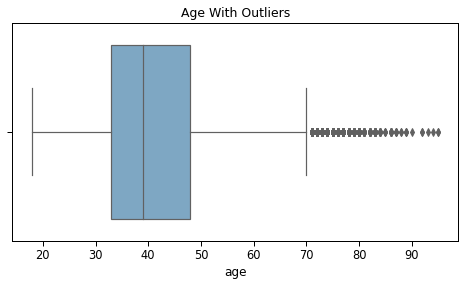

The first quartile is 33.0. 
The third quartile is 48.0. 
The IQR is 15.0.
The mean is 40.86.
The standard deviation is 10.44.
The median is 39.0.


In [92]:
# Boxplot is one of the best way to get insight of distribution .Below we do that for age .
figure1 = plt.figure(figsize = (8,4))
plt.title ('Age With Outliers')
sns.boxplot(x = bank_data['age'],palette="PuBu", orient='h')
plt.show()
#IQR
Q1 = bank_data['age'].quantile(0.25)
Q3 =bank_data['age'].quantile(0.75)
IQR = Q3-Q1

mean1 = round(bank_data['age'].mean(),2)
std1 = round(bank_data['age'].std(),2)
median1 = round(bank_data['age'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean1)
print('The standard deviation is %s.'%std1)
print('The median is %s.'%median1)

In [93]:

#Finding outliers for age 
bank_data_outlier = bank_data.loc[(bank_data['age'] <Q1-(1.5*IQR)) | (bank_data['age'] >  Q3+(1.5*IQR))]
average_age = round(bank_data.age.mean(), 2)
print('The average of age in the original data frame is %s.' % average_age)
average_age_bank_data_outlier= round(bank_data_outlier.age.mean(),2)
print('The average of age of outliers is %s.' % average_age_bank_data_outlier)



The average of age in the original data frame is 40.86.
The average of age of outliers is 76.8.


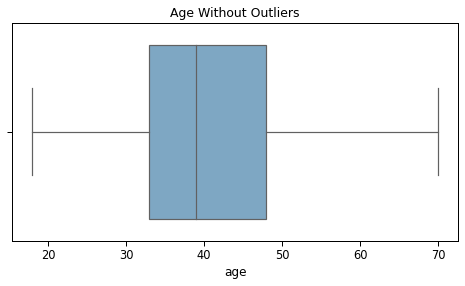

In [94]:

# Boxplot of age without outliers 
figure1 = plt.figure(figsize = (8,4))
plt.title ('Age Without Outliers')
sns.boxplot(x = bank_data['age'],palette="PuBu", orient='h',showfliers = False)
plt.show()

new = (bank_data['age'] >= Q1 - 1.5 * IQR) & (bank_data['age'] <= Q3 + 1.5 *IQR)



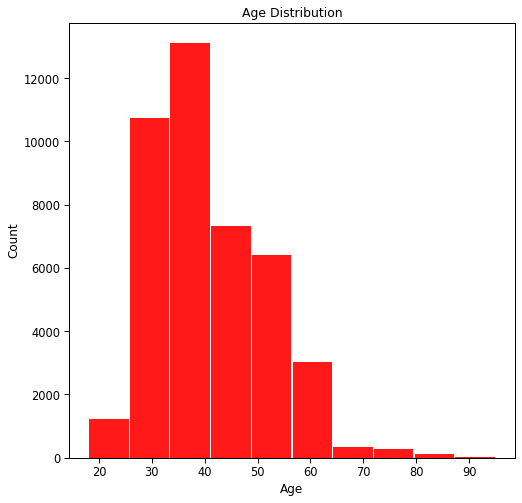

In [95]:
#Age Histogram (Histgram is another important tool to show distribution)
figure2 = plt.figure(figsize = (8,8))
plt.hist(bank_data['age'], bins=10, color='red', alpha=0.9, rwidth=.97)
plt.title ('Age Distribution')
plt.xlabel('Age') 
plt.ylabel('Count')
plt.show()

There are more clients who are 39 years old than any other age.

In [96]:
bank_data.loc[:,'age'].mode()

0    39
dtype: int32

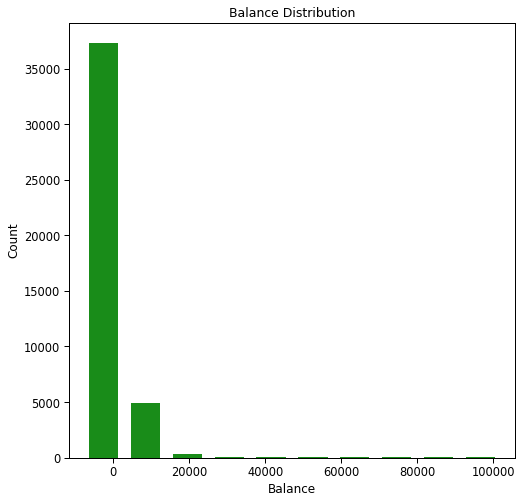

In [97]:
# Plotting a histogram (balance) to show distribution
figure = plt.figure(figsize = (8,8))
plt.hist(bank_data['balance'], bins=10, color='green', alpha=0.9, rwidth=0.7)
plt.title ('Balance Distribution')
plt.xlabel('Balance') 
plt.ylabel('Count')
plt.show()


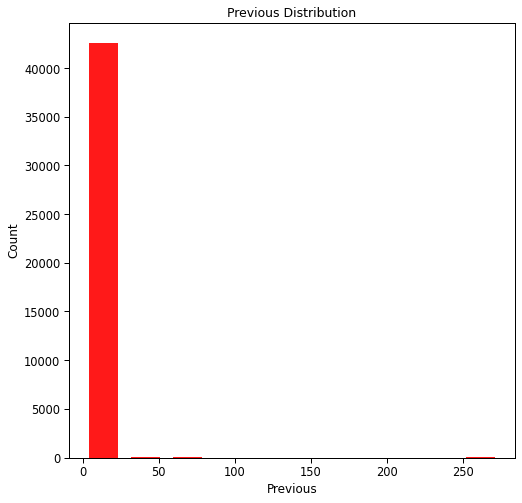

In [98]:
# Plotting a histogram (previous) to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(bank_data['previous'], bins=10, color='red', alpha=0.9, rwidth=0.7)
plt.title ('Previous Distribution')
plt.xlabel('Previous') 
plt.ylabel('Count')
plt.show()


The majority of these clients have negative balances.


# Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In [99]:
bank_data['deposit'] = bank_data.deposit.map(dict(yes=1, no=0))
bank_data['poutcome'] = bank_data.poutcome.map(dict(unknown=0, other=1, failure=2, success=3))

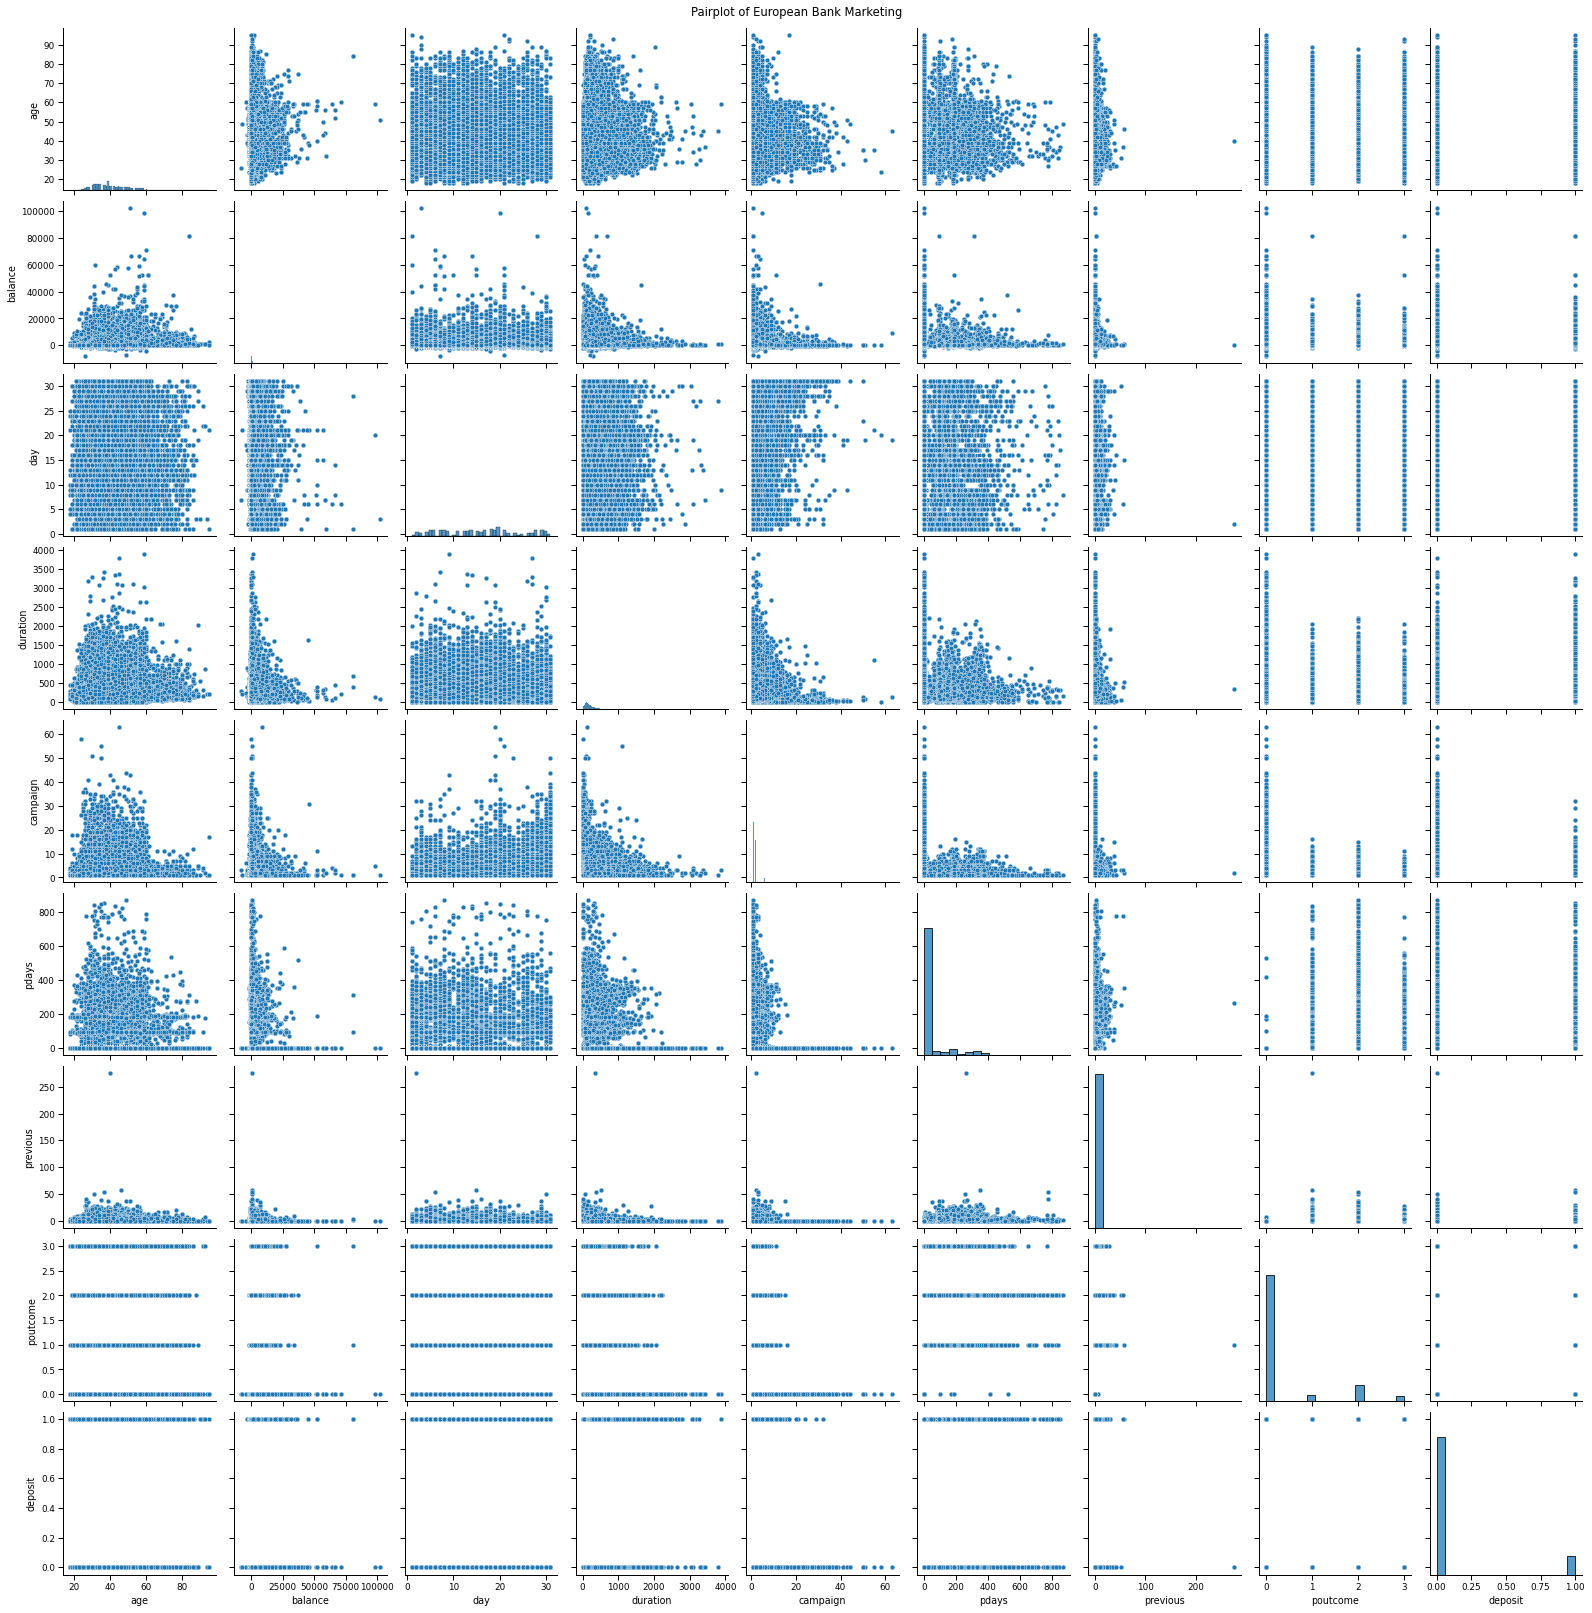

In [100]:
sns.set_context("paper", font_scale=1)
plot = sns.pairplot(bank_data, diag_kind='hist', dropna = True, palette='Blues')
plot.fig.suptitle("Pairplot of European Bank Marketing", y = 1.0001) 
plt.show()

     


# Diagnosing for correlations between variables and determining independent and dependent variables

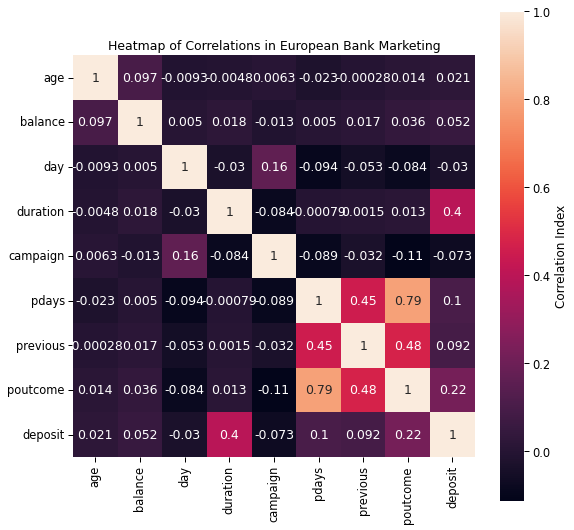

In [101]:
#Correlations between variables using a Heat Map
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale = 1.3)

plt.figure(figsize = (9,9))
x = sns.heatmap(bank_data.corr(),annot=True ,square = True, cbar_kws={'label': 'Correlation Index'})
x.set_title('Heatmap of Correlations in European Bank Marketing')

plt.show()

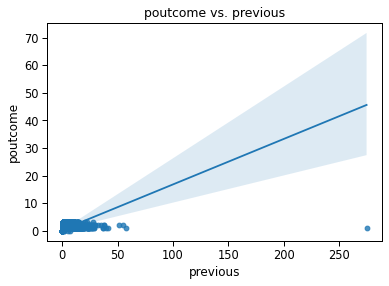

In [102]:
sns.regplot(data = bank_data, x = 'previous', y = 'poutcome')
plt.title('poutcome vs. previous')
plt.show()

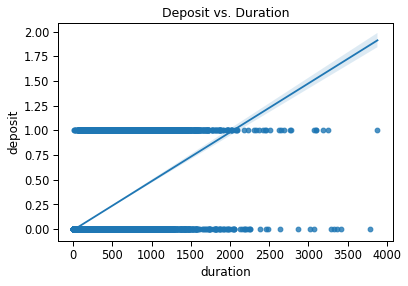

In [103]:
sns.regplot(data = bank_data, x = 'duration', y = 'deposit')
plt.title('Deposit vs. Duration')
plt.show()

In [105]:
bank_data['deposit'].head(10)

0     0
1     0
2     0
3     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: deposit, dtype: int64

 # Data Analytics

Determining the need for a supervised or unsupervised learning method and identifying dependent and independent variables

In [106]:
# Change yes and no answers from variables (column) to 0(no) and 1(yes) for linear regression
bank_data['loan'] = bank_data.loan.map(dict(yes=1, no=0))
bank_data['housing'] = bank_data.housing.map(dict(yes=1, no=0))
bank_data['default'] = bank_data.default.map(dict(yes=1, no=0))

In [107]:
bank_data['deposit'].head(10)

0     0
1     0
2     0
3     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: deposit, dtype: int64

In [108]:
##### Data Analysis
df = bank_data[['age','job','marital','deposit','balance','education']]

In [109]:
df.head(10)

,age,job,marital,deposit,balance,education
0,58,management,married,0,2143,tertiary
1,44,technician,single,0,29,secondary
2,33,entrepreneur,married,0,2,secondary
3,47,blue-collar,married,0,1506,unknown
5,35,management,married,0,231,tertiary
6,28,management,single,0,447,tertiary
7,42,entrepreneur,divorced,0,2,tertiary
8,58,retired,married,0,121,primary
9,43,technician,single,0,593,secondary
10,41,admin.,divorced,0,270,secondary


In [110]:
# hypothesis 1: Older people subscribe more than younger people

<AxesSubplot:xlabel='age', ylabel='deposit'>

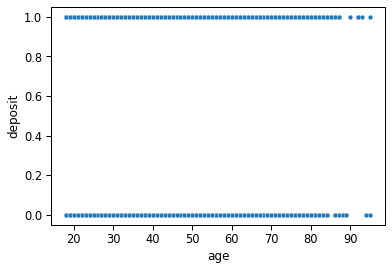

In [111]:
sns.scatterplot(x=df['age'],y=df['deposit'],data=df)

<AxesSubplot:xlabel='deposit', ylabel='age'>

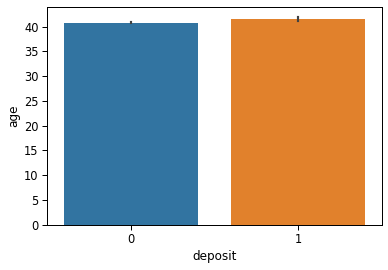

In [112]:
sns.barplot(y=df['age'],x=df['deposit'],data=df)

In [114]:
df['age'][df['deposit']==1].mean() # average age of people who did subscribe

41.46860581745236

In [115]:
df['age'][df['deposit']==0].mean() # average age of people who did not subscribe

40.78073116219668

In [118]:
# hypothesis 2: heatmap

<AxesSubplot:>

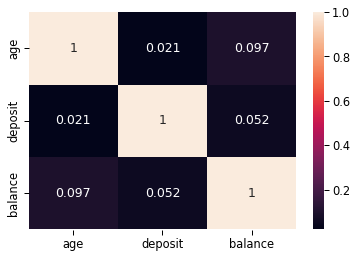

In [119]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='deposit', ylabel='job'>

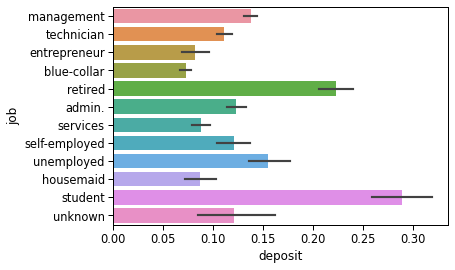

In [120]:
sns.barplot(y=df['job'],x=df['deposit'],data=df)

<AxesSubplot:xlabel='age', ylabel='balance'>

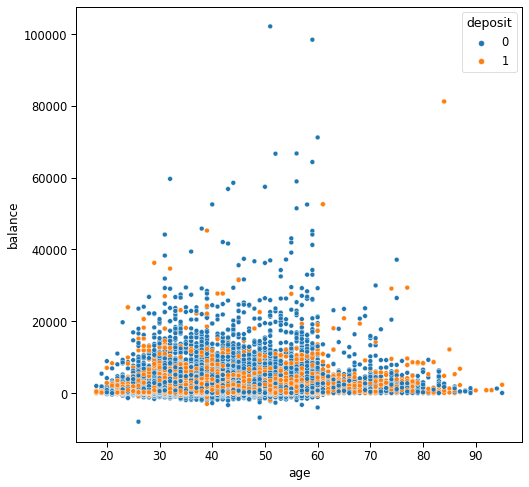

In [132]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['age'],y=df['balance'],hue=df['deposit'],data=df,y_bins=10,x_bins=20)

C:\Users\javad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='education'>

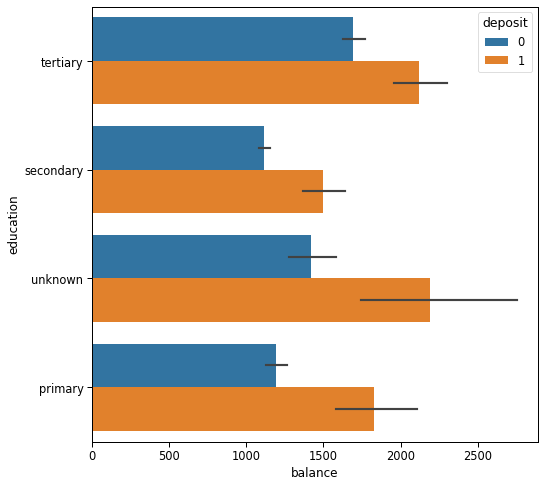

In [138]:
plt.figure(figsize=(8,8))
sns.barplot(df['balance'],df['education'],hue = df['deposit'],data=df)

C:\Users\javad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='marital'>

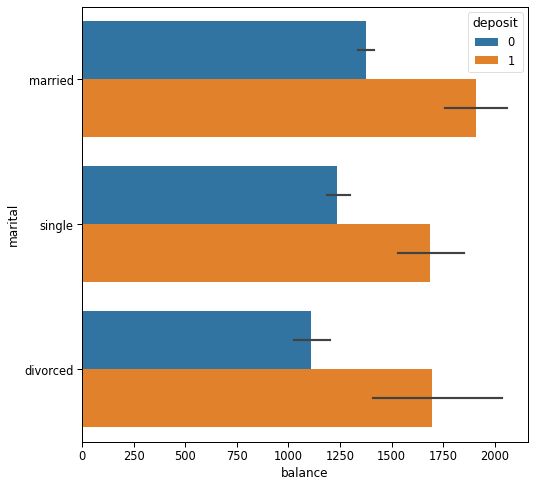

In [140]:
plt.figure(figsize=(8,8))
sns.barplot(df['balance'],df['marital'],hue = df['deposit'],data=df)

It seems that customers with higher balance more likely to subscribe the bank product. The visualization also suggests that married customers have shown more interest into the product in comparison to the single and divoerd customers.

C:\Users\javad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='education'>

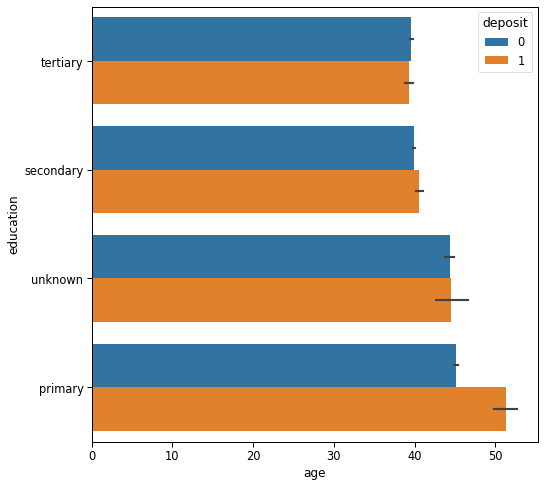

In [145]:
plt.figure(figsize=(8,8))
sns.barplot(df['age'],df['education'],hue = df['deposit'],data=df)

seems people with primary education and higher age more likely to subscribe

# Goal: ML Classification ( Supervised)


to predict whether or not a given customer subscribes. In fact, we want to predict the value
 of "deposit" (yes/no) for a given customer



# Method: Logistic Regression

In [53]:
# Created dummy variables for categorical variables
categorical_variables=['job','marital','education']
for var in categorical_variables:
    categorical_list='var'+'_'+var
    categorical_list = pd.get_dummies(df[var], prefix=var)
    df_d=df.join(categorical_list)
    df=df_d
categorical_variables=['job','marital','education']
data_vars=df_d.columns.values.tolist()
keep=[i for i in data_vars if i not in categorical_variables]



In [58]:
df_d.head()

,age,job,marital,deposit,balance,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,0,2143,tertiary,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,technician,single,0,29,secondary,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33,entrepreneur,married,0,2,secondary,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,47,blue-collar,married,0,1506,unknown,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35,management,married,0,231,tertiary,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
df_d.drop(columns = ['job','marital','education'],inplace = True)

In [62]:
df_d.head()

,age,deposit,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,0,29,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33,0,2,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35,0,231,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df_d.drop(columns=['deposit'],inplace = False)

y = df_d['deposit']


In [65]:
X.head()

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,33,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35,231,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [66]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: deposit, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [68]:
logreg.coef_

array([[-1.98479565e-02,  2.63910137e-05, -6.38367809e-02,
        -4.72957046e-01, -6.01355599e-02, -2.79409958e-02,
         3.52279302e-02,  3.20426770e-01, -1.25855549e-02,
        -1.84102521e-01,  5.46844553e-02, -1.98479758e-01,
         3.88808199e-02, -4.40947144e-04,  7.30303629e-02,
        -3.69013198e-01, -2.75276354e-01, -1.33344246e-01,
        -5.79891273e-01,  1.13969807e-01,  2.80065234e-02]])

In [69]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11256     0]
 [ 1515     0]]


In [153]:
df.head(20)

,age,job,marital,deposit,balance,education
0,58,management,married,NaN,2143,tertiary
1,44,technician,single,NaN,29,secondary
2,33,entrepreneur,married,NaN,2,secondary
3,47,blue-collar,married,NaN,1506,unknown
5,35,management,married,NaN,231,tertiary
6,28,management,single,NaN,447,tertiary
7,42,entrepreneur,divorced,NaN,2,tertiary
8,58,retired,married,NaN,121,primary
9,43,technician,single,NaN,593,secondary
10,41,admin.,divorced,NaN,270,secondary
